<a href="https://colab.research.google.com/github/yusrilihza69/Kuis-1/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODUL 12 – Feature Matching, Face Detection, Face Tracking**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama “Week12.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
seperti biasa.

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).

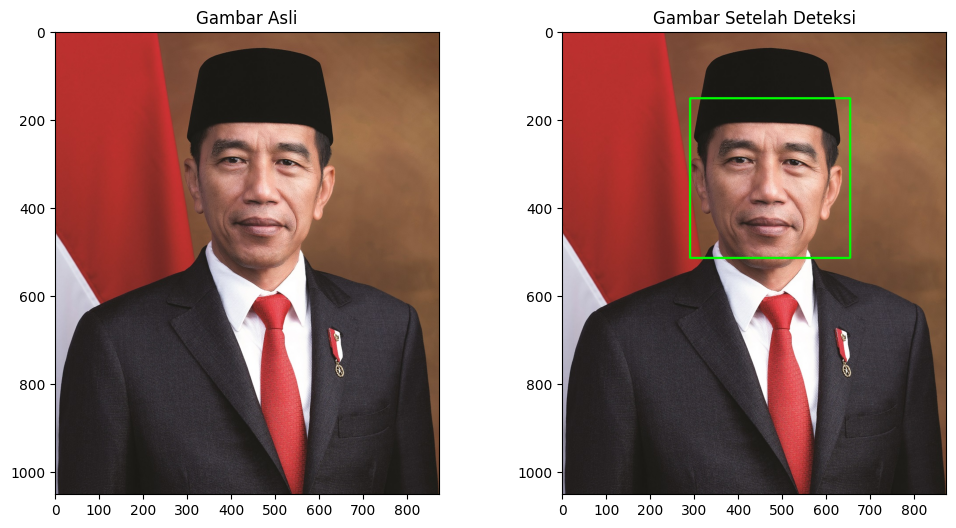

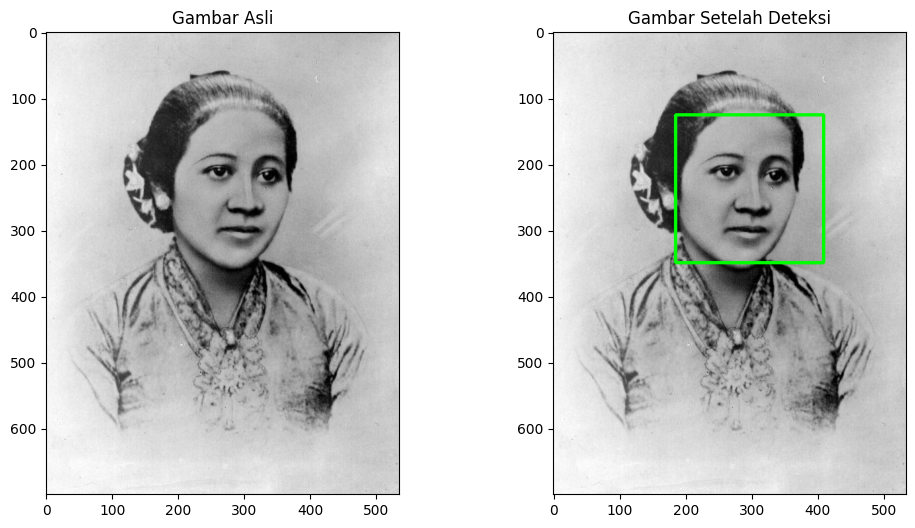

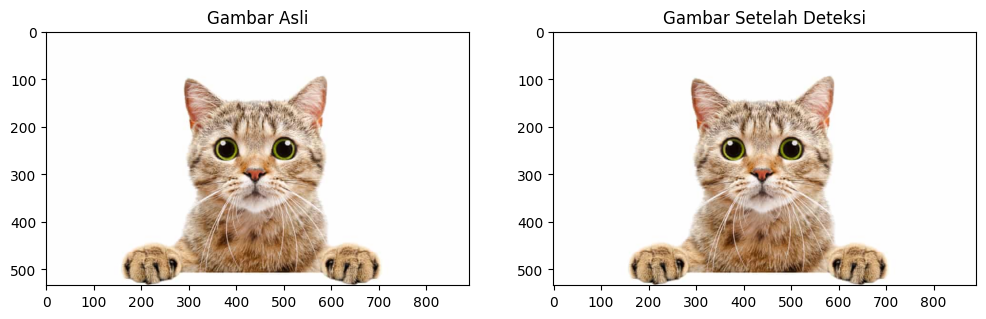

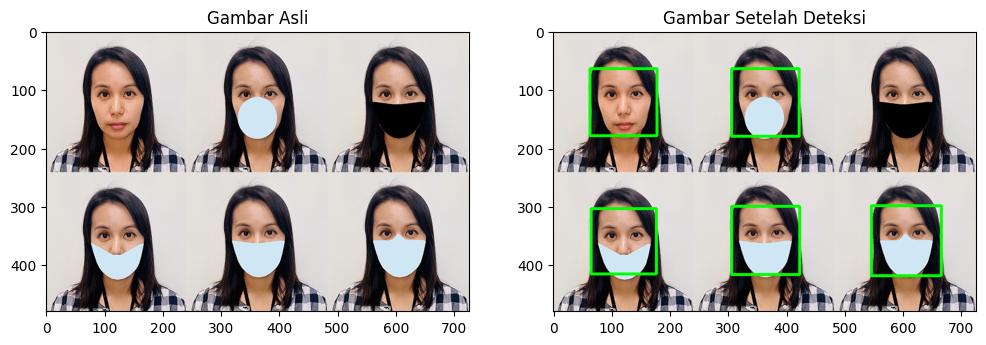

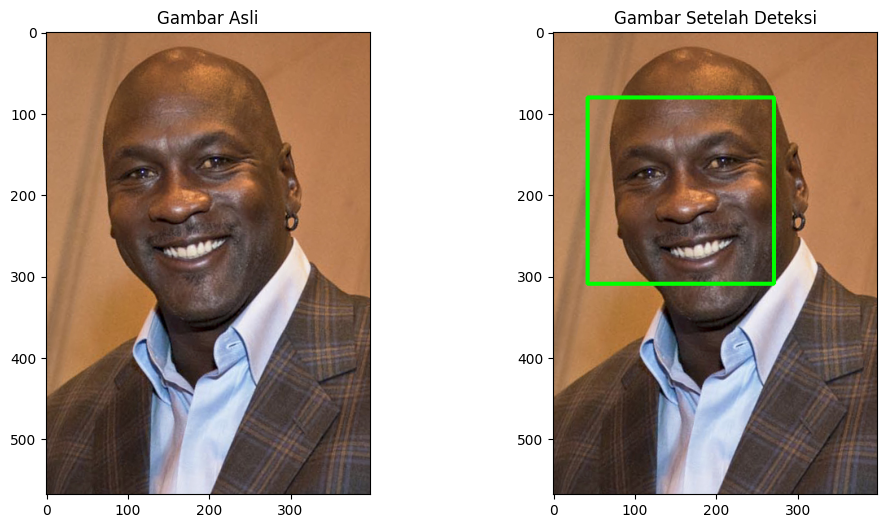

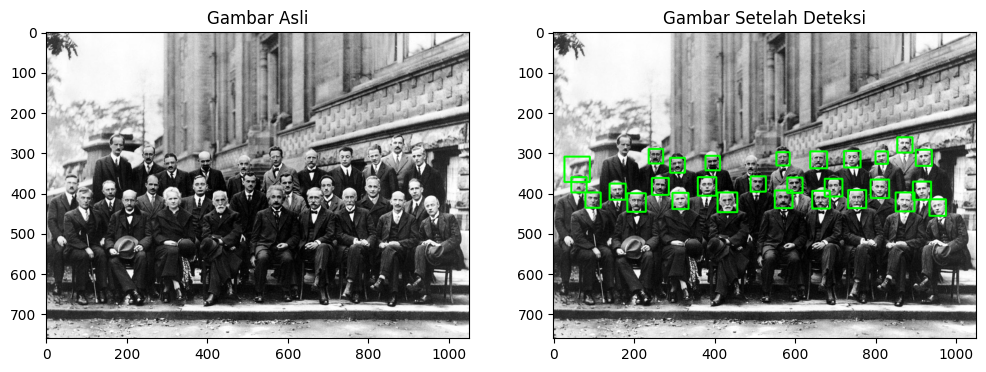

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Inisialisasi classifier wajah
cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK_2023/Images/haarcascades/haarcascade_frontalface_alt.xml')

# Fungsi untuk menampilkan gambar dengan kotak di sekitar wajah
def display_image_with_faces(image_path, cascade_classifier):
    img = cv2.imread(image_path)

    if img is not None:

        # Deteksi wajah
        roi_wajah = cascade_classifier.detectMultiScale(img)

        # Tampilkan gambar asli
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Gambar Asli')

        # Gambar kotak di sekitar wajah pada gambar setelah deteksi
        for (x, y, w, h) in roi_wajah:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

        img_kotak = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)
        # Tampilkan gambar setelah deteksi
        plt.subplot(1, 2, 2)
        plt.imshow(img_kotak)
        plt.title('Gambar Setelah Deteksi')

        plt.show()
    else:
        print("Gagal membaca gambar atau gambar tidak ada.")

# Jokowi
display_image_with_faces('/content/drive/MyDrive/PCVK_2023/Images/facedet/jokowi.jpg', cascade_wajah)

# RA.Kartini
display_image_with_faces('/content/drive/MyDrive/PCVK_2023/Images/facedet/kartini.jpg', cascade_wajah)

# Kucing
display_image_with_faces('/content/drive/MyDrive/PCVK_2023/Images/facedet/kucing.jpg', cascade_wajah)

# Perempuan Maskeran
display_image_with_faces('/content/drive/MyDrive/PCVK_2023/Images/facedet/mask.png', cascade_wajah)

# M. Jordan
display_image_with_faces('/content/drive/MyDrive/PCVK_2023/Images/facedet/mjordan.jpg', cascade_wajah)

# Kelompok
display_image_with_faces('/content/drive/MyDrive/PCVK_2023/Images/facedet/solvayconf.jpg', cascade_wajah)

Perhatikan pada hasil face detection diatas. Secara keseluruhan, face detection
dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah
bermasker, atau wajah yang berukuran kecil (solvay).

3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.

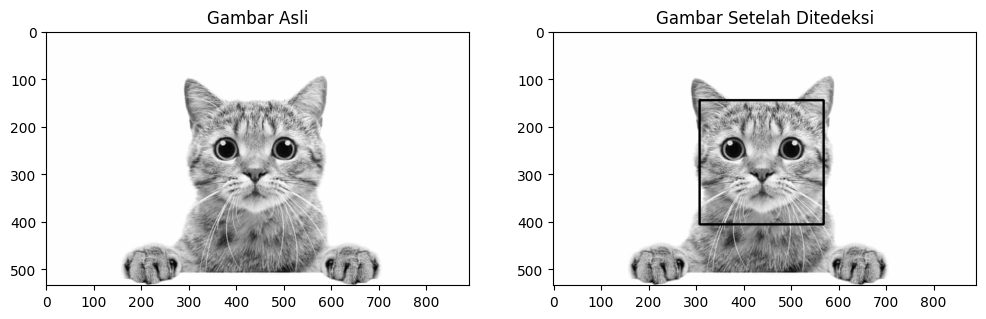

In [ ]:
# nomer 3 (cat face det)
import cv2
import matplotlib.pyplot as plt

cascade_cat = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK_2023/Images/haarcascades/haarcascade_frontalcatface.xml')

kucing = cv2.imread('/content/drive/MyDrive/PCVK_2023/Images/facedet/kucing.jpg', 0)

# Tampilkan gambar asli
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(kucing, cv2.COLOR_BGRA2RGB))
plt.title('Gambar Asli')

# mendeteksi wajah
roi_wajah = cascade_cat.detectMultiScale(kucing)

for (x,y,w,h) in roi_wajah:
  cv2.rectangle(kucing,(x,y),(x+w,y+h),(0,255,0),3)
  break

kucing_kotak = cv2.cvtColor(kucing, cv2.COLOR_BGRA2RGB)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(kucing_kotak, cv2.COLOR_BGR2RGB))
plt.title('Gambar Setelah Ditedeksi')
plt.show()

4. Cobakan juga untuk eyes detection.

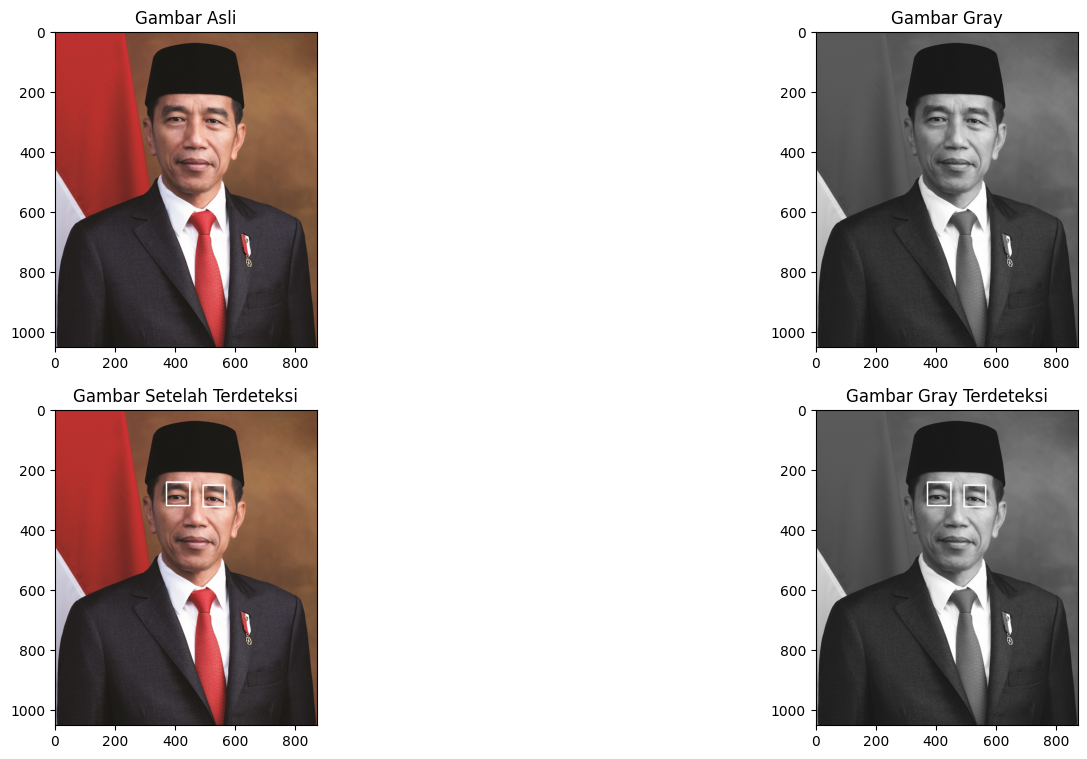

In [ ]:
# eyes detection
import cv2 as cv
import matplotlib.pyplot as plt

# Load the eye detection classifiers
cascade_lefteye = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_2023/Images/haarcascades/haarcascade_lefteye_2splits.xml')
cascade_righteye = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_2023/Images/haarcascades/haarcascade_righteye_2splits.xml')

# Read the input image
jokowi = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/facedet/jokowi.jpg')
jokowi_ori = jokowi.copy()


plt.figure(figsize=(18, 9))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(jokowi_ori, cv2.COLOR_BGRA2RGB))
plt.title('Gambar Asli')

jokowi_gray = cv.cvtColor(jokowi, cv.COLOR_BGR2GRAY)

# Detect eyes
roi_lefteye = cascade_lefteye.detectMultiScale(jokowi_gray)
roi_righteye = cascade_righteye.detectMultiScale(jokowi_gray)

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(jokowi_gray, cv2.COLOR_BGRA2RGB))
plt.title('Gambar Gray')

# Membuat kotak untuk mendeteksi mata (gambar gray)
for (x, y, w, h) in roi_lefteye:
    cv.rectangle(jokowi_gray, (x, y), (x+w, y+h), (255, 255, 255), 3)
    break
for (x, y, w, h) in roi_righteye:
    cv.rectangle(jokowi_gray, (x, y), (x+w, y+h), (255, 255, 255), 3)
    break

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(jokowi_gray, cv2.COLOR_BGRA2RGB))
plt.title('Gambar Gray Terdeteksi')

# Membuat kotak untuk mendeteksi mata (gambar gray)
for (x, y, w, h) in roi_lefteye:
    cv.rectangle(jokowi, (x, y), (x+w, y+h), (255, 255, 255), 3)
    break
for (x, y, w, h) in roi_righteye:
    cv.rectangle(jokowi, (x, y), (x+w, y+h), (255, 255, 255), 3)
    break

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(jokowi, cv2.COLOR_BGRA2RGB))
plt.title('Gambar Setelah Terdeteksi')
plt.show()

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

Text(0.5, 1.0, 'Gambar Blur')

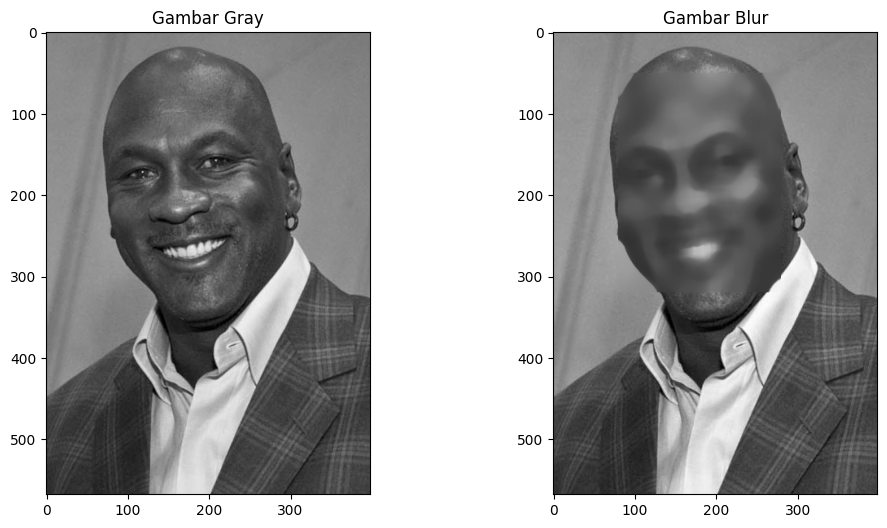

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Baca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK_2023/Images/facedet/mjordan.jpg')

# Gambar gray
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Tampilkan gambar gray
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_gray, cv2.COLOR_BGRA2RGB))
plt.title('Gambar Gray')

# Tentukan koordinat dan ukuran kotak ROI
x, y, w, h = 80, 50, 200, 270

# Ambil ROI dari gambar
roi = image[y:y+h, x:x+w]

# Ubah ROI menjadi skala abu-abu
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Terapkan medianBlur pada ROI
blurred_roi = cv2.medianBlur(gray_roi, 21)

# Masukkan kembali ROI yang telah di-blur ke dalam gambar asli
image[y:y+h, x:x+w] = cv2.cvtColor(blurred_roi, cv2.COLOR_GRAY2BGR)

# Konversi gambar kedua menjadi skala abu-abu
image_blur_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tampilkan gambar asli dan yang telah di-blur
plt.subplot(1, 2, 2)
plt.imshow(image_blur_gray, cmap='gray')
plt.title('Gambar Blur')

7. Lakukan segmentasi karakter pada KTP

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

ktp = cv2.imread("/content/drive/MyDrive/PCVK_2023/Images/KTP_More/ktp2.png")

# Convert the image to grayscale for edge detection
gray = cv2.cvtColor(ktp, cv2.COLOR_BGR2GRAY)

# Thresholding to create a binary image
ret, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)


# Closing to fill gaps between characters
kernel_closing = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel_closing)

# Find contours in the closed image
contours, hierarchy = cv2.findContours(closed, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a separate image
contour_image = ktp.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 6 and float(ras) <= 6:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 15 and w >= 6 and float(ras) <= 7:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

# Create a subplot with 2 rows and 3 columns
plt.figure(figsize=(20, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Thresholded Image
plt.subplot(2, 2, 2)
plt.imshow(thresholded, cmap='gray')
plt.title('Thresholded Image')

# Closed Image
plt.subplot(2, 2, 3)
plt.imshow(closed, cmap='gray')
plt.title('Closed Image')

# Image with Contours
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')

plt.show()

8. Lakukan cropping pada bagian NIK saja

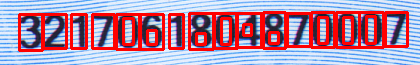

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

ktp = cv2.imread("/content/drive/MyDrive/PCVK_2023/Images/KTP_More/ktp2.png")

# Convert the image to grayscale for edge detection
gray = cv2.cvtColor(ktp, cv2.COLOR_BGR2GRAY)

# Thresholding to create a binary image
ret, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)


# Closing to fill gaps between characters
kernel_closing = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel_closing)

# Find contours in the closed image
contours, hierarchy = cv2.findContours(closed, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a separate image
contour_image = ktp.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 6 and float(ras) <= 6:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 15 and w >= 6 and float(ras) <= 7:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

crop_image = contour_image[125:190, 250:670]
cv2.imwrite('NIK_crop.jpg', crop_image)
cv2_imshow(crop_image)

9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.

In [ ]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf


# Load dataset MNIST
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Jumlah data yang ingin diambil dari setiap kategori
num_samples_per_class = 100

# List digit yang akan diambil (0 sampai 9)
digits_to_extract = list(range(10))

# Fungsi untuk mengambil sampel dari setiap kategori
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Ambil sampel dari setiap kategori
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

# Acak urutan data
np.random.shuffle(training_data)

# Pisahkan fitur dan label
X, Y = zip(*training_data)

# Konversi menjadi numpy array
X = np.array(X).reshape(-1, 28, 28, 1)

# Tulis ke file pickle
pickle_out = open("X_mnist.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y_mnist.pickle", "wb")
pickle.dump(to_categorical(Y, num_classes=10), pickle_out)
pickle_out.close()

11490434/11490434 [==============================] - 0s 0us/step


Penjelasan kode di atas adalah sebagai berikut ini

a. Import terlebih dahulu beberapa yang paket-paket yang dibutuhkan, ada beberapa
paket yang baru misalkan tqdm digunakan untuk meload data diikuti dengan
progress bar, numpy merupakan sebuah paket yang digunakan untuk melakukan
operasi-operasi matriks atau array serta pickle adalah depedensi untuk menyimpan
file untuk model data training.

b. Looping data training yang kelak digunakan untuk melabeli hasil pengenalan.
Looping semua file training untuk diubah ke dalam sebuah image array.

c. Variabel X dan variabel Y digunakan untuk menyimpan label dan feature, label
berisi karakter A-Z dan 0-9 sedangkan feture berisi data image array masing-masing
label tersebut.

d. Terakhir tulis isi variabel X dan variabel Y ke dalam sebuah file pickle. File pickle
tersebut nanti akan diload ketika proses training data.

10. Lakukan Training Data

Code berikut digunakan untuk melakukan training data

In [ ]:
import pickle
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

# Load file pickle
pickle_in = open("X_mnist.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y = pickle.load(pickle_in)

width, height = 28, 28  # Sesuaikan dengan ukuran gambar MNIST

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(10, activation='softmax')(fc_layer)

adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')

Epoch 1/20
32/32 [==============================] - 3s 28ms/step - loss: 4.2064 - accuracy: 0.2880
Epoch 2/20
32/32 [==============================] - 1s 27ms/step - loss: 1.3305 - accuracy: 0.6030
Epoch 3/20
32/32 [==============================] - 1s 28ms/step - loss: 0.7665 - accuracy: 0.7560
Epoch 4/20
32/32 [==============================] - 1s 27ms/step - loss: 0.4820 - accuracy: 0.8520
Epoch 5/20
32/32 [==============================] - 1s 27ms/step - loss: 0.3479 - accuracy: 0.8980
Epoch 6/20
32/32 [==============================] - 1s 26ms/step - loss: 0.2280 - accuracy: 0.9360
Epoch 7/20
32/32 [==============================] - 1s 27ms/step - loss: 0.1707 - accuracy: 0.9610
Epoch 8/20
32/32 [==============================] - 1s 29ms/step - loss: 0.1586 - accuracy: 0.9600
Epoch 9/20
32/32 [==============================] - 1s 46ms/step - loss: 0.0971 - accuracy: 0.9790
Epoch 10/20
32/32 [==============================] - 1s 46ms/step - loss: 0.0674 - accuracy: 0.9910
Epoch 11/

Dengan kode di atas kita akan membuat sebuah model, kode di atas menggunakan
deep learning dengan arsitektur CNN(Convolutional Neural Network). Sebenarnya
yang saya ketahui perbedaan mendasar arsitektur ini dengan neural network biasa
adalah masalah feature extraction, feature merupakan sebuah ciri yang khas yang
membedakan antara objek satu dengan objek lainnya. Sebagai contoh karakter A dan
karakter B pada pelat kendaraan tentunya memiliki ciri dengan bentuk yang berbeda.
Feature extraction yang dimiliki CNN(Convolutional Neural Network) sudah disediakan, kita tinggal mengutak-utik arsitekturnya/parameter yang ada di dalamnya.
Sedangkan neural network biasa kita harus mencari sendiri atau dilakukan secara
manual untuk mencari feature tersebut.

11. Testing Data

In [ ]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical

# Load dataset MNIST yang sudah disiapkan sebelumnya
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi data testing
X_test = X_test / 255.0

# Load model yang sudah di-training sebelumnya
model = tf.keras.models.load_model("anpr.model")

# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

# Ubah label ke dalam format one-hot encoding
Y_test_one_hot = to_categorical(Y_test)

# Evaluasi performa model
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

32/32 [==============================] - 0s 8ms/step - loss: 2.2550 - accuracy: 0.9900
Accuracy on the test set: 99.00%


**Pelabelan Citra Data Testing**

32/32 [==============================] - 1s 20ms/step


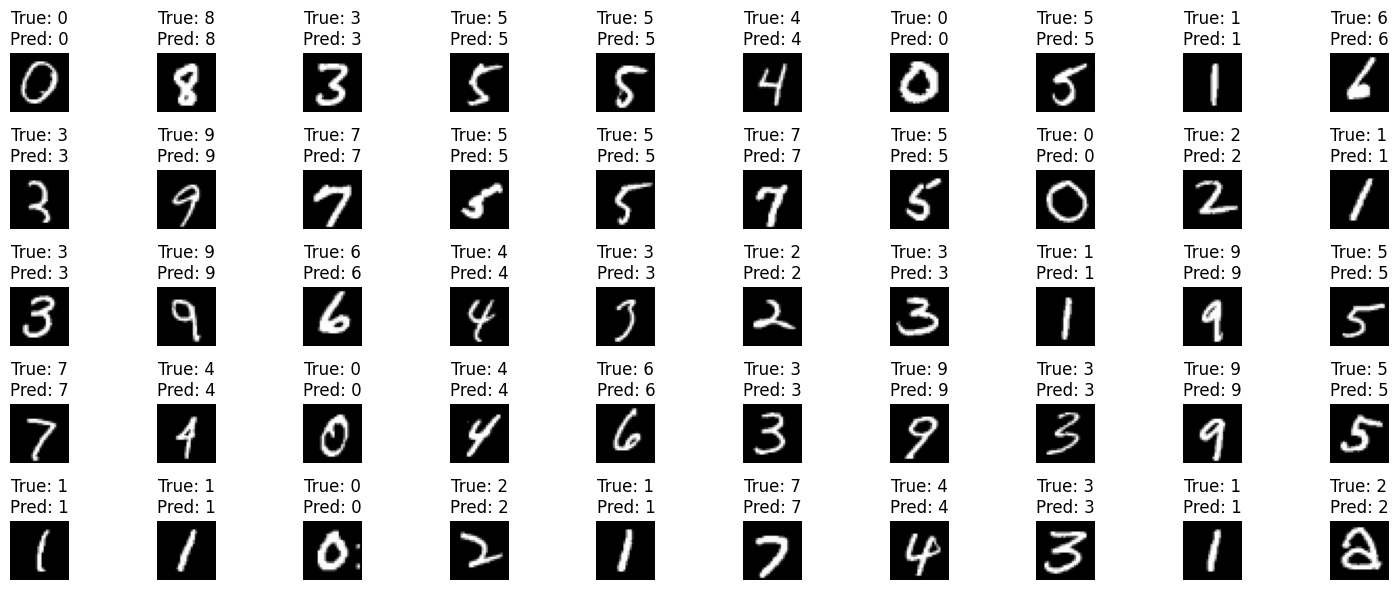

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar dan label
def show_images(images, true_labels, predicted_labels):
    plt.figure(figsize=(15, 6))
    for i in range(len(images)):
        plt.subplot(5, 10, i + 1)
        plt.imshow(images[i][:, :, 0], cmap='gray')

        # Tentukan warna teks berdasarkan prediksi yang benar atau salah
        text_color = 'red' if true_labels[i] != predicted_labels[i] else 'black'

        plt.title(f'True: {true_labels[i]}\nPred: {predicted_labels[i]}', color=text_color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load dataset MNIST yang sudah disiapkan sebelumnya
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi data testing
X_test = X_test / 255.0

# Load model yang sudah di-training sebelumnya
model = tf.keras.models.load_model("anpr.model")

# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

# Ambil label yang benar (tanpa one-hot encoding)
true_labels = Y_test.argmax(axis=1)

# Ambil label prediksi (tanpa one-hot encoding)
predicted_labels = np.argmax(predictions, axis=1)

# Pilih 50 gambar secara acak untuk ditampilkan
num_samples_to_show = 50
sample_indices = np.random.choice(len(X_test), num_samples_to_show, replace=False)

# Tampilkan gambar dan labelnya
show_images(X_test[sample_indices], true_labels[sample_indices], predicted_labels[sample_indices])


# **Tugas**
Silakan melakukan pengenalan NIK pada e-KTP yang terdapat pada tugas modul 11!

In [ ]:
# Install Tesseract OCR
!sudo apt install tesseract-ocr-ind

# Install library pytesseract
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 9 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 2s (3,019 kB/s)
debconf: unable to init

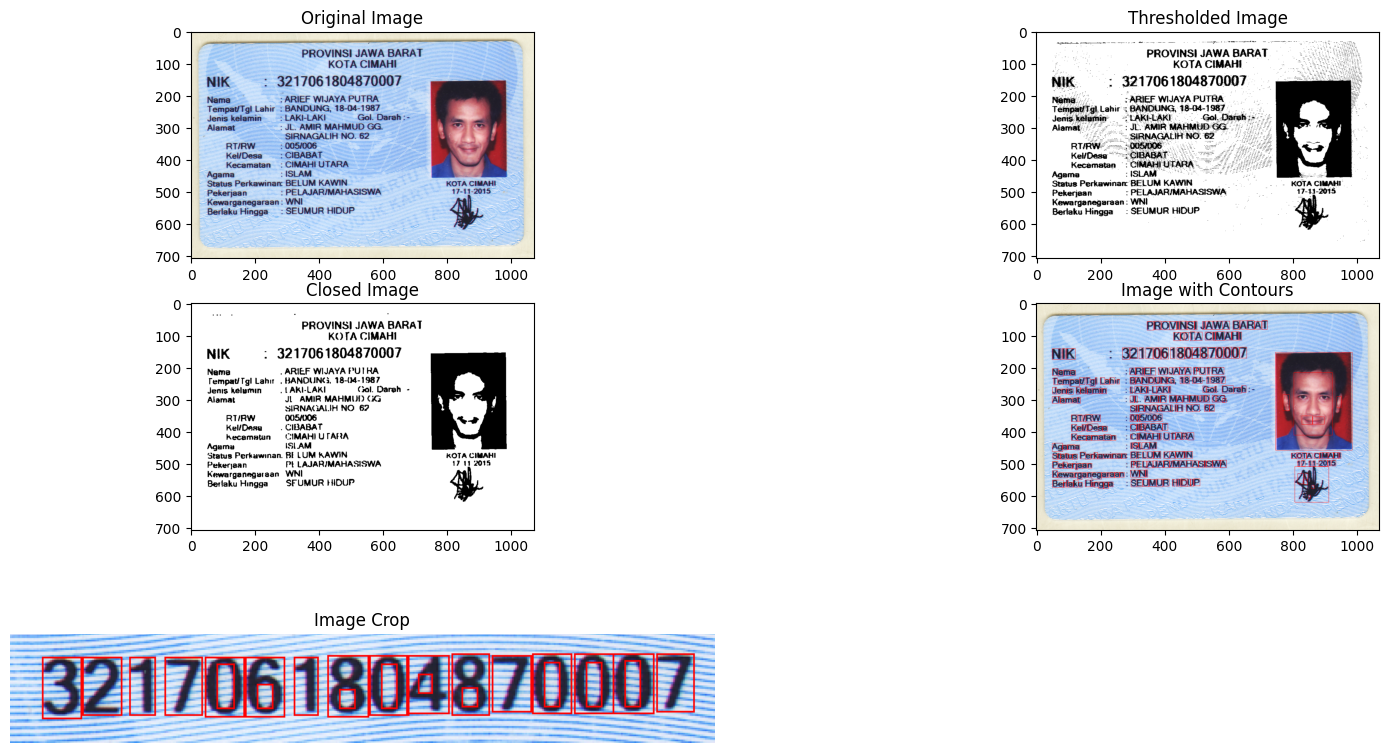

NIK pada e-KTP:  3217061804870007



In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pytesseract
import numpy as np

ktp = cv2.imread("/content/drive/MyDrive/PCVK_2023/Images/KTP_More/ktp2.png")

# Convert the image to grayscale for edge detection
gray = cv2.cvtColor(ktp, cv2.COLOR_BGR2GRAY)

# Thresholding to create a binary image
ret, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)


# Closing to fill gaps between characters
kernel_closing = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel_closing)

# Find contours in the closed image
contours, hierarchy = cv2.findContours(closed, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a separate image
contour_image = ktp.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 6 and float(ras) <= 6:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 15 and w >= 6 and float(ras) <= 7:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Crop image
crop_image = contour_image[125:190, 250:670]

# Create a subplot with 2 rows and 3 columns
plt.figure(figsize=(20, 10))

# Original Image
plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Thresholded Image
plt.subplot(3, 2, 2)
plt.imshow(thresholded, cmap='gray')
plt.title('Thresholded Image')

# Closed Image
plt.subplot(3, 2, 3)
plt.imshow(closed, cmap='gray')
plt.title('Closed Image')

# Image with Contours
plt.subplot(3, 2, 4)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')

# Image Crop
plt.subplot(3, 2, 5)
plt.axis('off')
plt.imshow(cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB))
plt.title('Image Crop')

plt.show()


# Mengeluarkan teks pada gambar

# Konversi gambar ke dalam format grayscale
gray_nik = cv2.cvtColor(crop_image, cv2.COLOR_BGR2GRAY)

# make more clear using closing
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(gray_nik, cv2.MORPH_CLOSE, kernel, iterations=1)
dilate = closing.copy()

# Praproses segmentasi teks menggunakan threshold dinamis
_, threshold_nik = cv2.threshold(dilate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Contoh segmentasi teks menggunakan pytesseract
custom_config = r'--oem 3 --psm 6 outputbase digits'
nik_text = pytesseract.image_to_string(threshold_nik, config=custom_config)

# Tampilkan hasil pengenalan NIK
print("NIK pada e-KTP: ", nik_text)